<a href="https://colab.research.google.com/github/hassantrms/hassan/blob/master/Copy_of_Copy_of_Step_4_4_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression

The regression is one of the fundamental techniques that will help us to find the answer to these types of questions by studying the relationship between the different variables that are relevant to the questions that we are trying to answer. 

Let’s consider a use case where we have collected students average test grade scores and their respective average studied hours for the test for a group of similar IQ students.  

In [2]:
# Code to read csv file into Colaboratory:
!pip install -U -q PyDrive
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

ERROR: Operation cancelled by user


KeyboardInterrupt: ignored

In [3]:
!pip install PyDrive


from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import os

class download_data_from_folder(object):
    def __init__(self,path):
        path_id = path[path.find('id=')+3:]
        self.file_list = self.get_files_in_location(path_id)
        self.unwrap_data(self.file_list)
    def get_files_in_location(self,folder_id):
        file_list = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)}).GetList()
        return file_list
    def unwrap_data(self,file_list,directory='.'):
        for i, file in enumerate(file_list):
            print(str((i + 1) / len(file_list) * 100) + '% done copying')
            if file['mimeType'].find('folder') != -1:
                if not os.path.exists(os.path.join(directory, file['title'])):
                    os.makedirs(os.path.join(directory, file['title']))
                print('Copying folder ' + os.path.join(directory, file['title']))
                self.unwrap_data(self.get_files_in_location(file['id']), os.path.join(directory, file['title']))
            else:
                if not os.path.exists(os.path.join(directory, file['title'])):
                    downloaded = drive.CreateFile({'id': file['id']})
                    downloaded.GetContentFile(os.path.join(directory, file['title']))
        return None

In [4]:
data_path = 'https://drive.google.com/open?id=13hFQ09ptYr-Ud5xOJ0Xx4cV0akc1RnZw'
download_data_from_folder(data_path)

NameError: ignored

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# importing linear regression function
import sklearn.linear_model as lm

# function to calculate r-squared, MAE, RMSE
from sklearn.metrics import r2_score , mean_absolute_error, mean_squared_error

%matplotlib inline

### Let's plot grades obtained vs hours studied 

In [6]:
# Load data
df = pd.read_csv('Grade_Set_1.csv')
print(df)

# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')
plt.show()
# check the correlation between variables
print("Correlation Matrix: ")
print(df.corr())

# Lets plot the distribution
fit = stats.norm.pdf(df.Test_Grade, np.mean(df.Test_Grade), np.std(df.Test_Grade))  
plt.plot(df.Test_Grade,fit,'-o')
plt.hist(df.Test_Grade,density=True)     
plt.show() 

FileNotFoundError: ignored

In [7]:
# Create linear regression object
lr = lm.LinearRegression()

x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values            # dependent variable 

# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

# manual prediction for a given value of x
print("Manual prediction :", 49.67777777777776 + 5.01666667*6)

# predict using the built-in function
print("Using predict function: ", lr.predict([[6]]))

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

NameError: ignored

In [8]:
# Let's check the performance of fitted model through R-squared

# add predict value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)

# Manually calculating R Squared
df['SST'] = np.square(df['Test_Grade'] - df['Test_Grade'].mean())
df['SSR'] = np.square(df['Test_Grade_Pred'] - df['Test_Grade'].mean())

print("Sum of SSR:", df['SSR'].sum())
print("Sum of SST:", df['SST'].sum())

print(df)
df.to_csv('r-squared.csv', index=False)

print("R Squared using manual calculation: ", df['SSR'].sum() / df['SST'].sum())

# Using built-in function
print("R Squared using built-in function: ", r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

NameError: ignored

### Outliers

Lets introduce a outlier i.e., a student has studied 5 hours and scored 100. Assume that this student is has higher IQ than others in this group. Notice the drop in R-squared value. So it is important to apply business logic to avoid including outliers in the training data set to generalize the model and increase accuracy

In [9]:
# Load data
df = pd.read_csv('Grade_Set_1.csv')

df.loc[9] = np.array([5, 100])

x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade.values            # dependent variable 

# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

# manual prediction for a given value of x
print("Manual prediction :", 54.4022988505747 + 4.64367816*6)

# predict using the built-in function
print("Using predict function: ", lr.predict([[6]]))

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

# add predict value to the data frame
df['Test_Grade_Pred'] = lr.predict(x)

# Using built-in function
print("R Squared : ", r2_score(df.Test_Grade,  df.Test_Grade_Pred))
print("Mean Absolute Error: ", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

FileNotFoundError: ignored

# Polynomial

It is a form higher order linear regression modeled between dependent and independent variables as an nth degree polynomial.

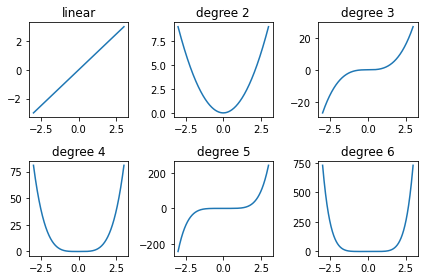

In [10]:
x = np.linspace(-3,3,1000)

# Plot subplots
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(nrows=2, ncols=3)

ax1.plot(x, x)
ax1.set_title('linear')
ax2.plot(x, x**2)
ax2.set_title('degree 2')
ax3.plot(x, x**3)
ax3.set_title('degree 3')
ax4.plot(x, x**4)
ax4.set_title('degree 4')
ax5.plot(x, x**5)
ax5.set_title('degree 5')
ax6.plot(x, x**6)
ax6.set_title('degree 6')

# tidy layout
plt.tight_layout()

Let’s consider another set of students average test grade scores and their respective average studied hours for similar IQ students.

In [11]:
# Load data
df = pd.read_csv('Grade_Set_2.csv')
print(df)

# Simple scatter plot
df.plot(kind='scatter', x='Hours_Studied', y='Test_Grade', title='Grade vs Hours Studied')

# check the correlation between variables
print("Correlation Matrix: ")
df.corr()

FileNotFoundError: ignored

In [12]:
# Create linear regression object
lr = lm.LinearRegression()

x= df.Hours_Studied[:, np.newaxis]           # independent variable
y= df.Test_Grade                             # dependent variable 

# Train the model using the training sets
lr.fit(x, y)
print("Intercept: ", lr.intercept_)
print("Coefficient: ", lr.coef_)

# manual prediction for a given value of x
print("Manual prdiction :", 7.27106067219556 + 7.25447403*6)

# predict using the built-in function
print("Using predict function: ", lr.predict([[6]]))

# plotting fitted line
plt.scatter(x, y,  color='black')
plt.plot(x, lr.predict(x), color='blue', linewidth=3)
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print("R Squared: ", r2_score(y, lr.predict(x)))

NameError: ignored

NumPy's vander function will return powers of the input vector

In [13]:
lr = lm.LinearRegression()

x= df.Hours_Studied        # independent variable
y= df.Test_Grade           # dependent variable 

# NumPy's vander function will return powers of the input vector
for deg in [1, 2, 3, 4, 5]:
    lr.fit(np.vander(x, deg + 1), y);
    y_lr = lr.predict(np.vander(x, deg + 1))
    plt.plot(x, y_lr, label='degree ' + str(deg));
    plt.legend(loc=2);
    print("R-squared for degree " + str(deg) + " = ",  r2_score(y, y_lr))
plt.plot(x, y, 'ok')

NameError: ignored

sklearn provides a function to generate a new feature matrix consisting of all polynomial combinations of the features with degree less than or equal to the specified degree

In [14]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x= df.Hours_Studied[:, np.newaxis] # independent variable
y= df.Test_Grade                   # dependent variable 

degree = 3
model = make_pipeline(PolynomialFeatures(degree), lr)


model.fit(x, y)

plt.scatter(x, y,  color='black')
plt.plot(x, model.predict(x), color='green')
plt.title('Grade vs Hours Studied')
plt.ylabel('Test_Grade')
plt.xlabel('Hours_Studied')

print("R Squared using built-in function: ", r2_score(y, model.predict(x)))

NameError: ignored